In [2]:
from __future__ import print_function
import os
import shutil

import dendropy
from dendropy.interop import raxml

In [3]:
ebola_data = dendropy.DnaCharacterMatrix.get_from_path('trim.fasta', 'fasta')
rx = raxml.RaxmlRunner()
ebola_tree = rx.estimate_tree(ebola_data, ['-m', 'GTRGAMMA', '-N', '10'])
print(rx.working_dir_path)
del ebola_data

In [4]:
ebola_tree.write_to_path('my_ebola.nex', 'nexus')

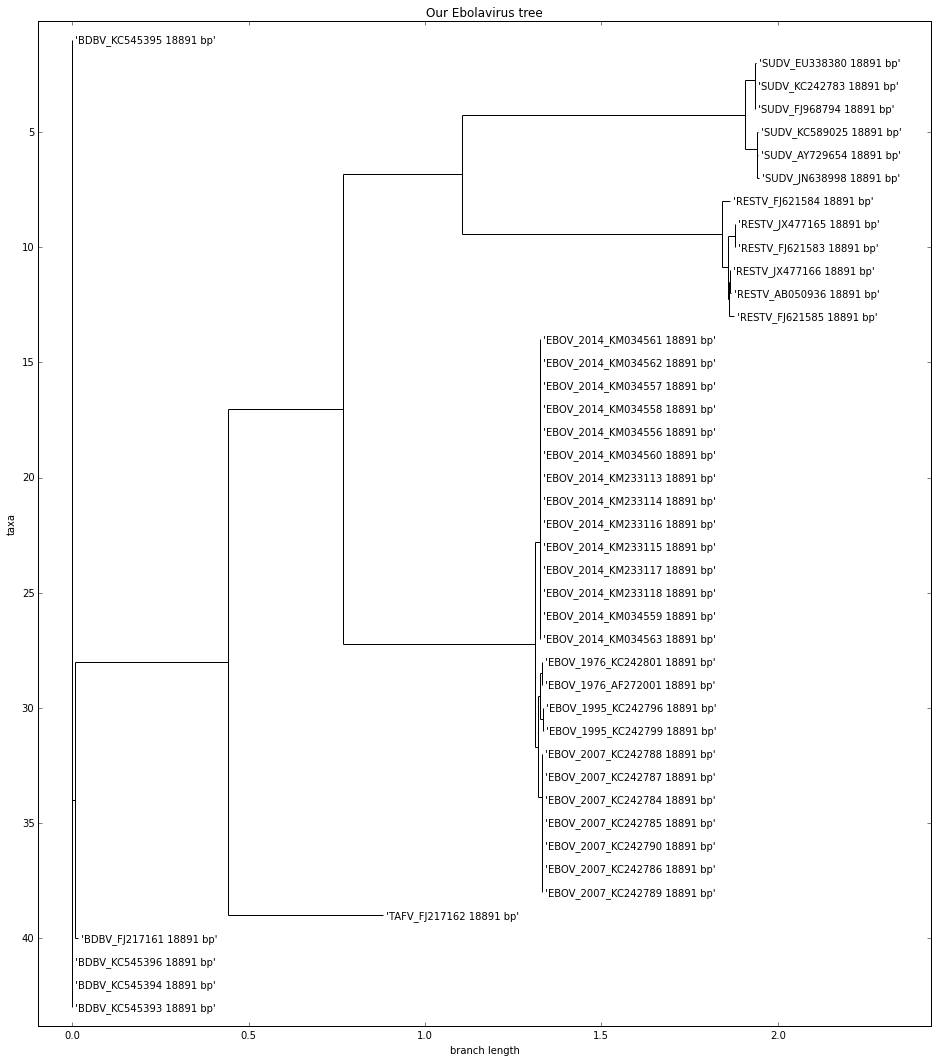

In [5]:
import matplotlib.pyplot as plt
from Bio import Phylo
%matplotlib inline
my_ebola_tree = Phylo.read('my_ebola.nex', 'nexus')
my_ebola_tree.name = 'Our Ebolavirus tree'

fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(1, 1, 1)
Phylo.draw(my_ebola_tree, axes=ax)

## RAxML with Biopython

In [6]:
import random
import sys
from Bio.Phylo.Applications import RaxmlCommandline
raxml_cline = RaxmlCommandline(sequences='trim.fasta',
                               model='GTRGAMMA', name='biopython',
                               num_replicates='10',
                               parsimony_seed=random.randint(0, sys.maxint),
                               working_dir=os.getcwd() + os.sep + 'bp_rx')
print(raxml_cline)
try:
    os.mkdir('bp_rx')
except OSError:
    shutil.rmtree('bp_rx')
    os.mkdir('bp_rx')
out, err = raxml_cline()

raxmlHPC -m GTRGAMMA -n biopython -p 2353686657231764225 -s trim.fasta -w /home/tra/bioinf-python/notebooks/05_Phylo/bp_rx -N 10


In [7]:
from Bio import Phylo
biopython_tree = Phylo.read('bp_rx/RAxML_bestTree.biopython', 'newick')

In [8]:
print(biopython_tree)

Tree(rooted=False, weight=1.0)
    Clade(branch_length=0.0)
        Clade(branch_length=0.000128955724784, name='BDBV_KC545395')
        Clade(branch_length=5.31617480088e-07)
            Clade(branch_length=0.000193460047895, name='BDBV_KC545394')
            Clade(branch_length=0.000192817743797)
                Clade(branch_length=0.00739438627021)
                    Clade(branch_length=0.432371170237)
                        Clade(branch_length=0.32760844139)
                            Clade(branch_length=0.540864149049)
                                Clade(branch_length=0.00857826414043)
                                    Clade(branch_length=0.0108468728986)
                                        Clade(branch_length=5.31617480088e-07)
                                            Clade(branch_length=6.39157885481e-05)
                                                Clade(branch_length=6.39148613243e-05, name='EBOV_2007_KC242786')
                                                